<a href="https://colab.research.google.com/github/hugozub/MIAD/blob/main/ProyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final
Hugo Alexis Zubia Briones

AL263169

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

**Importar dataset**

In [3]:
bank_marketing = fetch_ucirepo(id=222)

X = bank_marketing.data.features
y = bank_marketing.data.targets

print(bank_marketing.metadata)

print(bank_marketing.variables)

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [4]:
print(X.info())
print(X.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB
None
   age           job  marital  education default  balance housing loan  \
0   58    management  ma

In [5]:
df = pd.concat([X, y], axis=1)
print(df.shape)
print(df.isna().sum())


(45211, 17)
age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64


**OneHotEncoder**

In [6]:
categorical_cols_na = ['job', 'education', 'contact', 'poutcome']

target_column_name = 'y'

X = df.drop(columns=[target_column_name])
y = df[target_column_name]

cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(exclude=['object']).columns

le = LabelEncoder()
y_encoded = le.fit_transform(y)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)

X_processed = preprocessor.fit_transform(X)

**Histograma de columnas numericas**

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day_of_week'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>, <Axes: >, <Axes: >]],
      dtype=object)

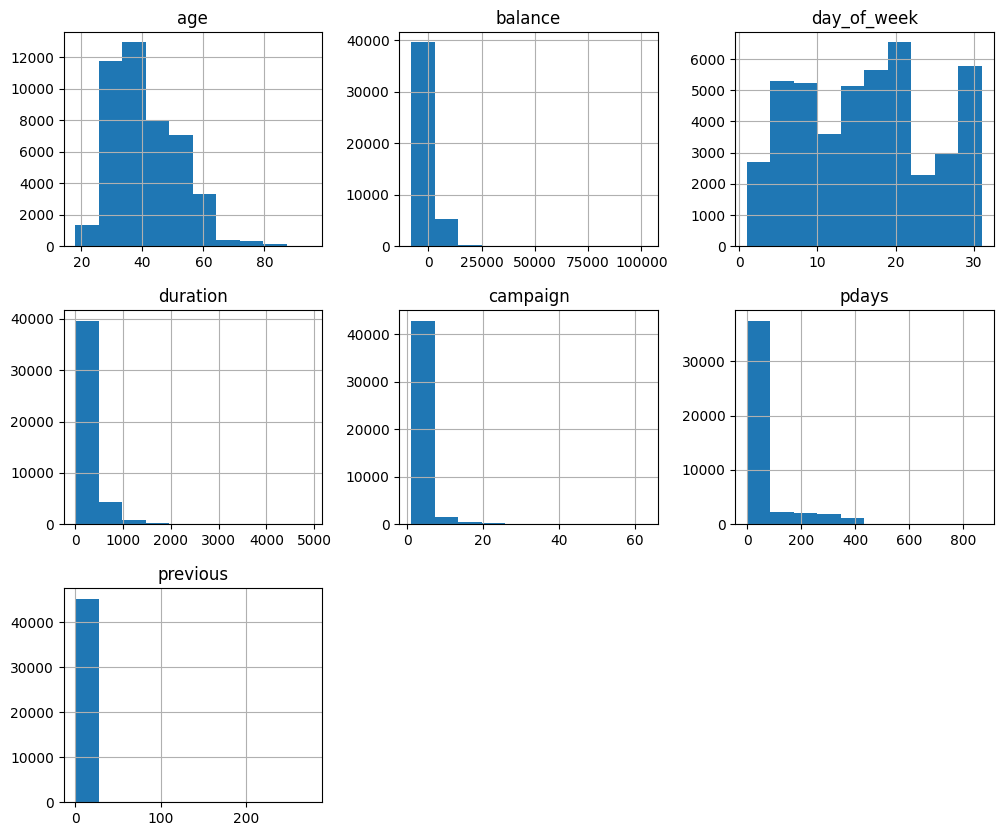

In [7]:
df[num_cols].hist(figsize=(12, 10))

**Boxplot Columnas numericas**

<Axes: >

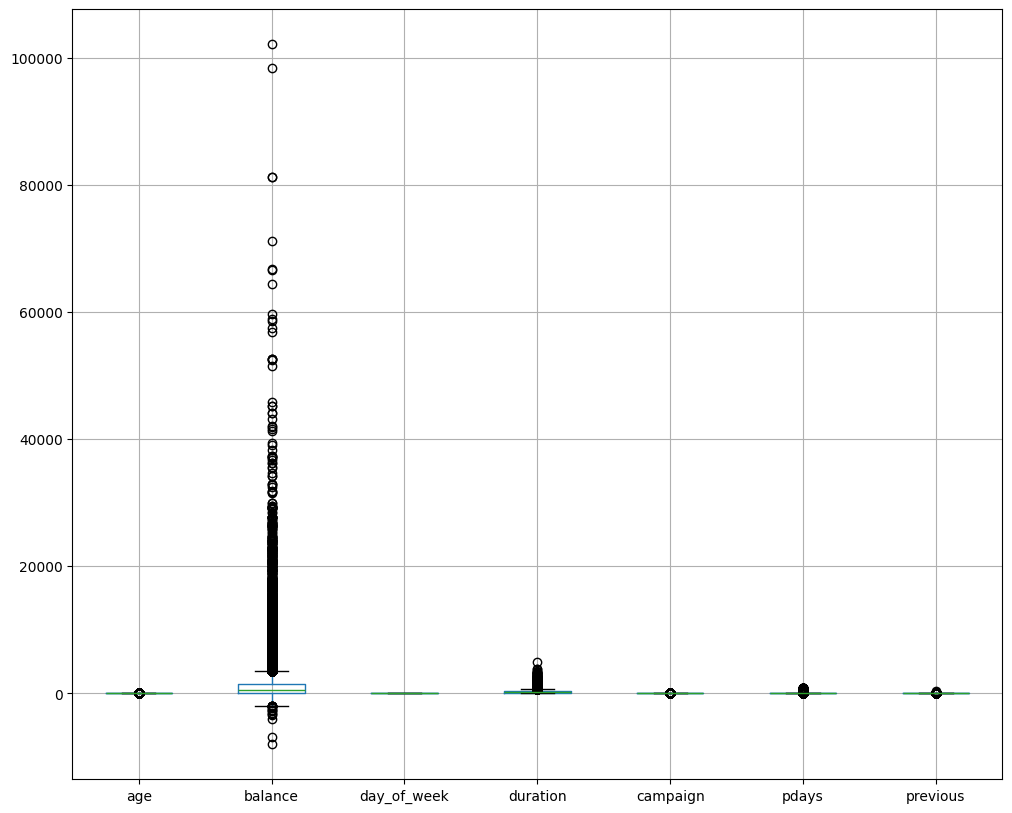

In [8]:
df[num_cols].boxplot(figsize=(12, 10))

**Heatmap Columans Numericas**

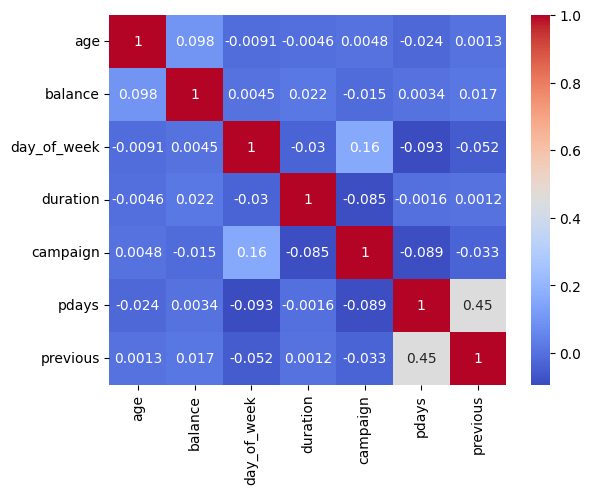

In [9]:
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.show()

**Valance de la columnas target**

In [10]:
df['y'].value_counts(normalize=True)


,proportion
y,
no,0.883015
yes,0.116985


In [11]:
df[num_cols].describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**Entrenamiento**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Regresión logística**

In [13]:
log_model = LogisticRegression(max_iter=1000, class_weight="balanced")
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)
print(" Regresión Logística:")
print(classification_report(y_test, y_pred_log))

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      7985
           1       0.42      0.81      0.55      1058

    accuracy                           0.85      9043
   macro avg       0.70      0.83      0.73      9043
weighted avg       0.91      0.85      0.87      9043



**Random Forest**

In [14]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7985
           1       0.69      0.33      0.45      1058

    accuracy                           0.90      9043
   macro avg       0.80      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043



# **Optimización de hiperparametros**

**Regresión Logística**

In [15]:
log_params = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ["l2"],
    "solver": ["lbfgs", "liblinear"]
}

log_search = RandomizedSearchCV(
    LogisticRegression(max_iter=1000, class_weight="balanced"),
    log_params,
    n_iter=5,
    cv=3,
    scoring="f1",
    random_state=42
)

log_search.fit(X_train_scaled, y_train)
log_best = log_search.best_estimator_
y_pred_log_best = log_best.predict(X_test_scaled)

print("Regresión Logística Optimizada:")
print(log_search.best_params_)
print(classification_report(y_test, y_pred_log_best))


=== Logistic Regression Optimizada ===
{'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.01}
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      7985
           1       0.42      0.81      0.55      1058

    accuracy                           0.85      9043
   macro avg       0.69      0.83      0.73      9043
weighted avg       0.91      0.85      0.87      9043



**Random Forest**

In [16]:
rf_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rf_search = RandomizedSearchCV(
    RandomForestClassifier(class_weight="balanced", random_state=42),
    rf_params,
    n_iter=10,
    cv=3,
    scoring="f1",
    random_state=42
)

rf_search.fit(X_train, y_train)
rf_best = rf_search.best_estimator_
y_pred_rf_best = rf_best.predict(X_test)

print("Random Forest Optimizado:")
print(rf_search.best_params_)
print(classification_report(y_test, y_pred_rf_best))


=== Random Forest Optimizado ===
{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 20}
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      7985
           1       0.50      0.79      0.61      1058

    accuracy                           0.88      9043
   macro avg       0.73      0.84      0.77      9043
weighted avg       0.91      0.88      0.89      9043



# **Conclusiones**
Se evaluaron dos modelos, regresión lineal y random forest, en la versión base y optimización de hiperparámetros. El objetivo era predecir la respuesta "yes" en un dataset desbalanceado del 12%.

 * Regresión logística:

 Tuvo un comportamiento consistente antes y después de la optimización. El parametro recall para la clase es de 0.81, esto quiere decir que el modelo identifica correcatamente a la mayoría de los clientes que sí aceptarían. Sin embargo la precisión es del 0.42, puede implicar falsos positivos.

+ Random Forest:
Para el modelo base hubo un recall de 0.33, esto nos indica un modelo que no es optimo,, sin embargo cuando se hizo la optmización, el recall llegó a 0.79, parecido a la regresión logísitca pero tuvo una mejor precisión de 0-50 y un F1 score mejor, Esto nos indica que el modelo tiene un resultado similar a la regresión logísitca, pero con menos falsos positivos.

La regresión es un modelo preferible si se busca un mayor recall, pero el random forest optimizado tiene un desempeño más equilibrado con todos sus parametros.